<a href="https://colab.research.google.com/github/nothing2c/AI-Assignment-3/blob/main/AI_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext google.colab.data_table

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
from sklearn.metrics import confusion_matrix
from sklearn import svm
import seaborn as sn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
url = 'https://raw.githubusercontent.com/nothing2c/AI-Assignment-3/main/heart.csv'

df = pd.read_csv(url)

The following dataset was aquired from https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset. It contains 14 columns that contain the following information:

age : Age of the patient

sex : Sex of the patient (0 = female, 1 = male)

cp : Chest Pain type

*   Value 0: typical angina
*   Value 1: atypical angina
*   Value 2: non-anginal pain
*   Value 3: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

*   Value 0: normal
*   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
*   Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slp : the slope of the peak exercise ST segment (0 = upsloping; 1 = flat; 2 = downsloping)

caa: number of major vessels (0-3)

thal : 1 = normal; 2 = fixed defect; 3 = reversable defect

output : 0= less chance of heart attack, 1= more chance of heart attack

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


The first thing to check is the ratio of the outputs:

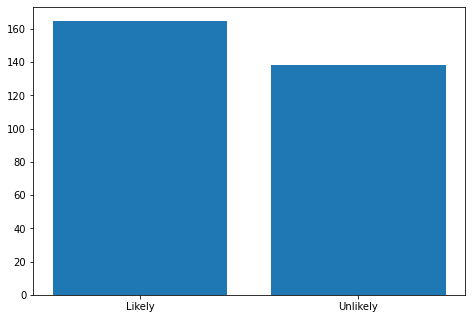

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
results = ["Likely", "Unlikely"]
likely = df[df["output"] == 1]
unlikely = df[df["output"] == 0]
nums = [len(likely["output"]), len(unlikely["output"])]
ax.bar(results, nums)
plt.show()

The number of entries that are 'likely' to have a heart attack is almost the same as 'unlikely'. This is an acceptable ratio to continue with.

Male to Female Ratio:

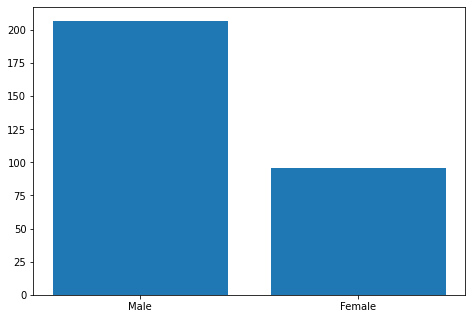

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gend = ["Male", "Female"]
males = df[df["sex"] == 1]
females = df[df["sex"] == 0]
num_gend = [len(males["sex"]), len(females["sex"])]
ax.bar(gend, num_gend)
plt.show()

While the ratio isn't even, according to https://www.health.harvard.edu/heart-health/throughout-life-heart-attacks-are-twice-as-common-in-men-than-women, men are twice as likely to have a heart attack as women. Since the ratio of heart attack to non-heart attack in this dataset is fairly even, it makes sense that men would appear twice as often in this dataset.

In [ ]:
def heart_attack_by_dtype_range(dtype, result=1):
  all_heart_attacks = []
  for i in range(min(df[dtype]), max(df[dtype])):
    num_heart_attacks = 0
    for out in df[df[dtype] == i]["output"]:
      if out == result:
        num_heart_attacks += 1
    all_heart_attacks.append(num_heart_attacks)
    
  return all_heart_attacks

In [ ]:
def heart_attack_by_dtype_cat(dtype, cat, result=1):
  num_heart_attacks = 0
  for out in df[df["output"] == result][dtype]:
    if cat == out:
      num_heart_attacks += 1
    
  return num_heart_attacks

Number of probable heart attacks by age:

In [ ]:
ha_age = heart_attack_by_dtype_range("age", 0)
no_ha_age = heart_attack_by_dtype_range("age", 1)

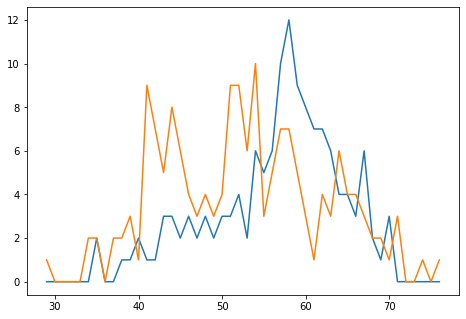

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ages = range(min(df["age"]), max(df["age"]))
ax.plot(ages, ha_age)
ax.plot(ages, no_ha_age)
plt.show()

The blue line represents the age of a person who is likely to have a heart attack and the yellow line represents the age of a person who is not likely to have a heart attack. the graph shows that around the age of 60 is where most people have a high chance of a heart attack. From the data it also shows that of the people who were aged ~60, very few were not at risk of a heart attack.

Probable heart attacks coresponding chest pain type:

In [ ]:
ha_typical_angina = heart_attack_by_dtype_cat("cp", 0)
ha_atypical_angina = heart_attack_by_dtype_cat("cp", 1)
ha_non_anginal_pain = heart_attack_by_dtype_cat("cp", 2)
ha_asymptomatic = heart_attack_by_dtype_cat("cp", 3)

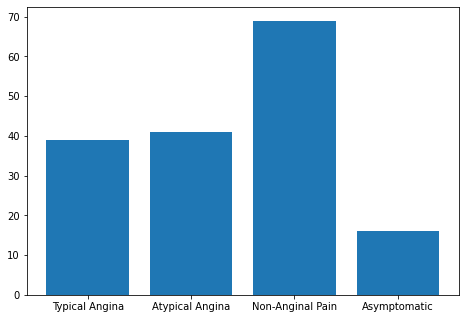

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cp_types = ["Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"]
cp_results = [ha_typical_angina, ha_atypical_angina, ha_non_anginal_pain, ha_asymptomatic]
ax.bar(cp_types, cp_results)
plt.show()

The most common chest pain type for the people who were at risk of a heart attack is Non-Anginal Pain, while the least common was no chest pain (Asymptomatic). The fact that some heart-attacks still occured without the presence of any chest pain shows that it is not a definitive answer for whether a heart attack is likely or not 

In [ ]:
ha_thalanch = heart_attack_by_dtype_range("thalachh")

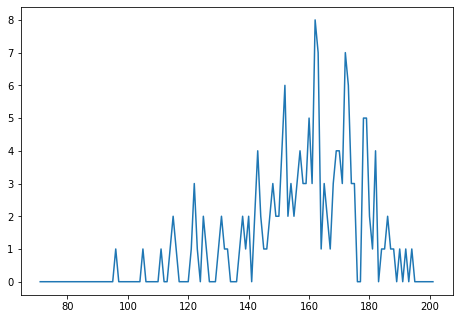

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
thal = range(min(df["thalachh"]), max(df["thalachh"]))
ax.plot(thal, ha_thalanch)
plt.show()

Finally, the maximum heart rate achieved averages around 160. Seeing as the number of 'likelies' between the range of a normal resting heart rate (60 - 100) is only 1, it can be determined that the heart rate of the individual is an important piece of information when determining whether they are at ridk of a heart attack. 

From this information, we can see that there are some symptoms that greatly lead towards a heart attack, such as heart rate, and some that cannot be used as a definitve means, such as chest pain. With this information, the goal is to determine whether an AI model can be used to accurately determine whether someone is at risk of a heart attack or not.

First, check to ensure the data is in the correct format:

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

All data is numeric so its good to continue. The next step is to split the data into training and testing data, both having their targe set to the 'output' column:

In [ ]:
data = df[["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng", "oldpeak", "slp", "caa", "thall"]]

In [ ]:
x = data
y = df["output"]
yc = to_categorical(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 3)

In [ ]:
display(x_train)
display(y_train)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3


197    0
15     1
227    0
146    1
115    1
      ..
277    0
256    0
131    1
249    0
152    1
Name: output, Length: 212, dtype: int64

The first model tested is a sequential model:

In [ ]:
model = Sequential()

activation_layer = keras.activations.relu
loss_function = keras.losses.mean_squared_error
optimizer = keras.optimizers.Adam()

model.add(Dense(2, input_dim=13, activation=activation_layer))
model.add(Dense(9, activation=activation_layer))
model.add(Dense(1, activation="linear"))
model.compile(loss=loss_function, optimizer=optimizer, metrics=["accuracy"])

In [ ]:
my_training_stats = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 86ms/step - loss: 2645.9710 - accuracy: 0.4781 - val_loss: 2271.8767 - val_accuracy: 0.4176
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 2163.4615 - accuracy: 0.4636 - val_loss: 1786.8298 - val_accuracy: 0.4176
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 1683.8597 - accuracy: 0.4893 - val_loss: 1409.9364 - val_accuracy: 0.4176
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 1388.1480 - accuracy: 0.4604 - val_loss: 1118.2137 - val_accuracy: 0.4176
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 1079.8207 - accuracy: 0.4690 - val_loss: 893.9874 - val_accuracy: 0.4176
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 822.7897 - accuracy: 0.4480 - val_loss: 720.3445 - val_accuracy: 0.4176
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 680.7959 - accuracy: 0.4929 - val_loss: 583.9085 - val_accura

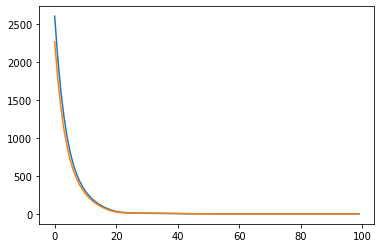

In [ ]:
plt.plot(my_training_stats.history["loss"])
plt.plot(my_training_stats.history["val_loss"])

The graph shows that the trend of the result is correct, but the model ended with an accuracy of ~45%

Next, various other models are tested based off of the radmap found at https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

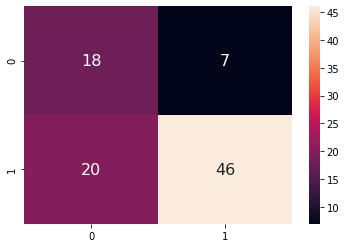

In [ ]:
svc = svm.SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
c_mat = confusion_matrix(pred, y_test)
sn.heatmap(c_mat, annot=True, annot_kws={"size": 16})

In [ ]:
svc.score(x_test, y_test)

0.7032967032967034

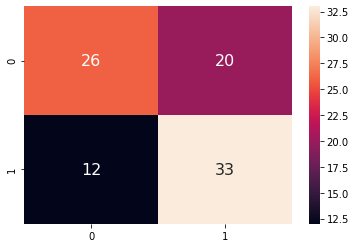

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
pred = neigh.predict(x_test)
c_mat = confusion_matrix(neigh.predict(x_test), y_test)
sn.heatmap(c_mat, annot=True, annot_kws={"size": 16})

In [ ]:
neigh.score(x_test, y_test)

0.6483516483516484

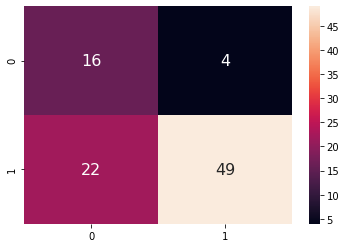

In [ ]:
bagging = BaggingClassifier(svm.SVC(), max_samples=0.5, max_features=0.5)
bagging.fit(x_train, y_train)
pred = bagging.predict(x_test)
c_mat = confusion_matrix(pred, y_test)
sn.heatmap(c_mat, annot=True, annot_kws={"size": 16})

In [ ]:
bagging.score(x_test, y_test)

0.7142857142857143

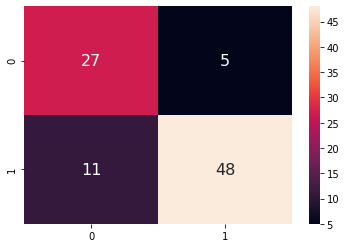

In [ ]:
forrest = RandomForestClassifier(n_estimators=1000)
forrest.fit(x_train, y_train)
pred = forrest.predict(x_test)
c_mat = confusion_matrix(pred, y_test)
sn.heatmap(c_mat, annot=True, annot_kws={"size": 16})

In [ ]:
forrest.score(x_test, y_test)

0.8241758241758241

The most effective model was the RandomForrestClassifier with a score of 82%. To try and improve this score, all the clumns that contain categorical information were split into their own columns:

In [ ]:
new_col = to_categorical(x["sex"])
x["sex_f"] = new_col[: , 0]
x["sex_m"] = new_col[: , 1]
x = x.drop("sex", axis=1)

In [ ]:
new_col = to_categorical(x["cp"])
x["cp_0"] = new_col[: , 0]
x["cp_1"] = new_col[: , 1]
x["cp_2"] = new_col[: , 2]
x["cp_3"] = new_col[: , 3]
x = x.drop("cp", axis=1)

In [ ]:
new_col = to_categorical(x["restecg"])
x["ecg_0"] = new_col[: , 0]
x["ecg_1"] = new_col[: , 1]
x["ecg_2"] = new_col[: , 2]
x = x.drop("restecg", axis=1)

In [ ]:
new_col = to_categorical(x["exng"])
x["exng_0"] = new_col[: , 0]
x["exng_1"] = new_col[: , 1]
x = x.drop("exng", axis=1)

In [ ]:
new_col = to_categorical(x["slp"])
x["slp_1"] = new_col[: , 0]
x["slp_2"] = new_col[: , 1]
x["slp_3"] = new_col[: , 2]
x = x.drop("slp", axis=1)

In [ ]:
new_col = to_categorical(x["thall"])
x["thall_1"] = new_col[: , 1]
x["thall_2"] = new_col[: , 2]
x["thall_3"] = new_col[: , 3]
x = x.drop("thall", axis=1)

In [ ]:
x

,age,trtbps,chol,fbs,thalachh,oldpeak,caa,sex_f,sex_m,cp_0,cp_1,cp_2,cp_3,ecg_0,ecg_1,ecg_2,exng_0,exng_1,slp_1,slp_2,slp_3,thall_1,thall_2,thall_3
0,63,145,233,1,150,2.3,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,37,130,250,0,187,3.5,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,41,130,204,0,172,1.4,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,56,120,236,0,178,0.8,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,57,120,354,0,163,0.6,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,0,123,0.2,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
299,45,110,264,0,132,1.2,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
300,68,144,193,1,141,3.4,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
301,57,130,131,0,115,1.2,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 3)

In [ ]:
display(x_train)
display(y_train)

,age,trtbps,chol,fbs,thalachh,oldpeak,caa,sex_f,sex_m,cp_0,cp_1,cp_2,cp_3,ecg_0,ecg_1,ecg_2,exng_0,exng_1,slp_1,slp_2,slp_3,thall_1,thall_2,thall_3
197,67,125,254,1,163,0.2,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
15,50,120,219,0,158,1.6,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
227,35,120,198,0,130,1.6,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
146,44,118,242,0,149,0.3,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
115,37,120,215,0,170,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,57,124,261,0,141,0.3,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
256,58,128,259,0,130,3.0,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
131,49,134,271,0,162,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
249,69,140,254,0,146,2.0,3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


197    0
15     1
227    0
146    1
115    1
      ..
277    0
256    0
131    1
249    0
152    1
Name: output, Length: 212, dtype: int64

In [ ]:
model = Sequential()

activation_layer = keras.activations.relu
loss_function = keras.losses.mean_squared_error
optimizer = keras.optimizers.Adam()

model.add(Dense(2, input_dim=24, activation=activation_layer))
model.add(Dense(9, activation=activation_layer))
model.add(Dense(1, activation="linear"))
model.compile(loss=loss_function, optimizer=optimizer, metrics=["accuracy"])

In [ ]:
my_training_stats = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 38ms/step - loss: 33.8451 - accuracy: 0.5446 - val_loss: 18.0251 - val_accuracy: 0.5824
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 14.9594 - accuracy: 0.5347 - val_loss: 7.5102 - val_accuracy: 0.5824
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 6.4345 - accuracy: 0.5323 - val_loss: 2.5341 - val_accuracy: 0.5824
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 2.0731 - accuracy: 0.5480 - val_loss: 0.6933 - val_accuracy: 0.5934
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6872 - accuracy: 0.5331 - val_loss: 0.2418 - val_accuracy: 0.6044
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.2602 - accuracy: 0.6026 - val_loss: 0.2501 - val_accuracy: 0.5165
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.2563 - accuracy: 0.5118 - val_loss: 0.3141 - val_accuracy: 0.4176
Epoch 8/100
7/7 [===

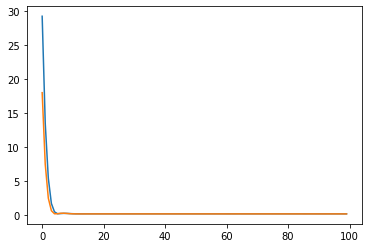

In [ ]:
plt.plot(my_training_stats.history["loss"])
plt.plot(my_training_stats.history["val_loss"])

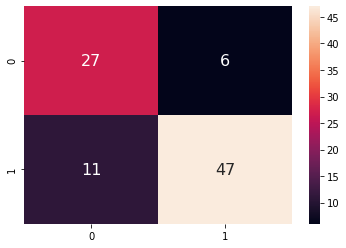

In [ ]:
forrest = RandomForestClassifier(n_estimators=1000)
forrest.fit(x_train, y_train)
pred = forrest.predict(x_test)
c_mat = confusion_matrix(pred, y_test)
sn.heatmap(c_mat, annot=True, annot_kws={"size": 16})

In [ ]:
forrest.score(x_test, y_test)

0.8131868131868132

The results are largely the same showing that this step isnt necessary. The result is that the RandomForrestClasifier is the best model to use for this dataset. However it only achieves a score of ~82% so it is not an absolute means of determining whether someone is at risk of a heart attack.